In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import scores_data_analysis as sda
import rescoring
import sentiment_analyzer_builder as sab

[nltk_data] Downloading package names to /home/jwnicoll/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jwnicoll/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import sys
!{sys.executable} -m pip install np
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

import math
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sda.get_merged_df('scores_commonurls.csv','imdb_scores.csv')
df

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score
0,Red Notice,92.0,35,rotten,46.762225,64.0
1,Finch,67.0,73,fresh,66.533956,70.0
2,The Many Saints of Newark,59.0,71,fresh,65.852098,64.0
3,Worth,77.0,81,certified-fresh,73.602667,68.0
4,Cinderella,61.0,42,rotten,50.559862,73.0
...,...,...,...,...,...,...
985,Shanghai,37.0,4,rotten,16.623056,72.0
986,Hotel Transylvania 2,63.0,55,rotten,59.537158,67.0
987,The Green Inferno,29.0,38,rotten,55.329595,53.0
988,The Walk,77.0,83,certified-fresh,73.959908,73.0


In [5]:
df.dropna(subset=['Tomatometer Score', 'SA Score', 'IMDb Score'], inplace=True)
df.reset_index(drop=True)

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score
0,Red Notice,92.0,35,rotten,46.762225,64.0
1,Finch,67.0,73,fresh,66.533956,70.0
2,The Many Saints of Newark,59.0,71,fresh,65.852098,64.0
3,Worth,77.0,81,certified-fresh,73.602667,68.0
4,Cinderella,61.0,42,rotten,50.559862,73.0
...,...,...,...,...,...,...
985,Shanghai,37.0,4,rotten,16.623056,72.0
986,Hotel Transylvania 2,63.0,55,rotten,59.537158,67.0
987,The Green Inferno,29.0,38,rotten,55.329595,53.0
988,The Walk,77.0,83,certified-fresh,73.959908,73.0


In [6]:
df['IMDb Score'] = df['IMDb Score'].apply(sda.normalize_imdb_score)
df

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score
0,Red Notice,92.0,35,rotten,46.762225,60.000000
1,Finch,67.0,73,fresh,66.533956,66.666667
2,The Many Saints of Newark,59.0,71,fresh,65.852098,60.000000
3,Worth,77.0,81,certified-fresh,73.602667,64.444444
4,Cinderella,61.0,42,rotten,50.559862,70.000000
...,...,...,...,...,...,...
985,Shanghai,37.0,4,rotten,16.623056,68.888889
986,Hotel Transylvania 2,63.0,55,rotten,59.537158,63.333333
987,The Green Inferno,29.0,38,rotten,55.329595,47.777778
988,The Walk,77.0,83,certified-fresh,73.959908,70.000000


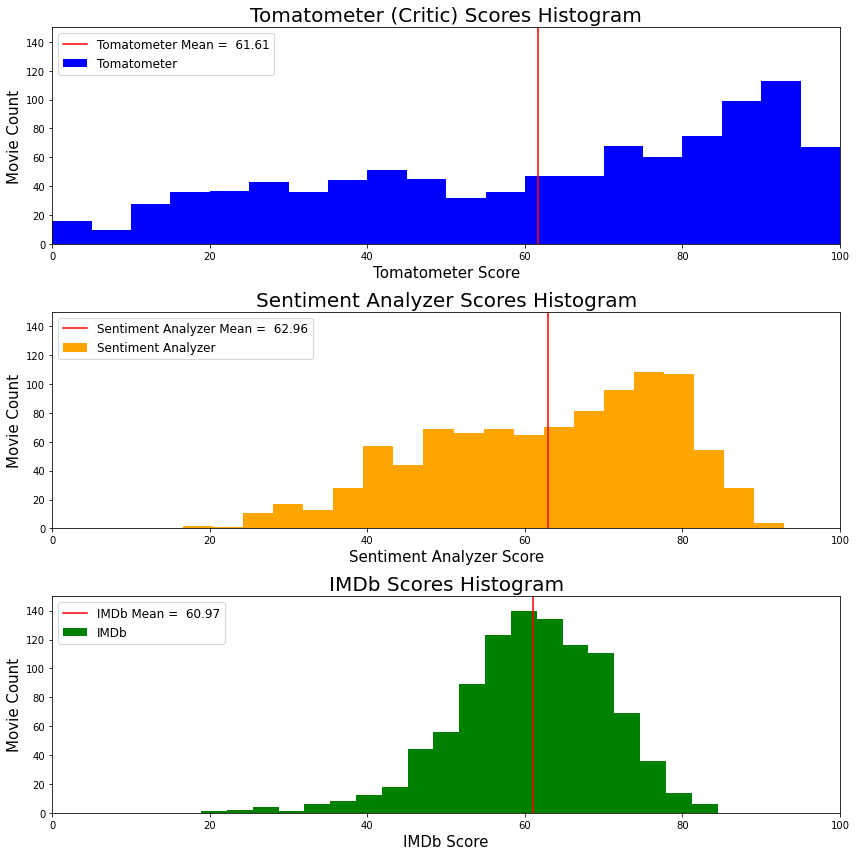

In [7]:
data1 = df['Tomatometer Score']
data2 = df['SA Score']
data3 = df['IMDb Score']
tomatometer_mean = data1.mean()
sa_mean = data2.mean()
imdb_mean = data3.mean()
num_bins = 20
fig=plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.set_xlim(0,100)
ax1.set_ylim(0,150)
ax2.set_xlim(0,100)
ax2.set_ylim(0,150)
ax3.set_xlim(0,100)
ax3.set_ylim(0,150)
ax1.hist(data1, num_bins, facecolor='blue', label='Tomatometer')
ax1.axvline(x=tomatometer_mean, color='red', label=f'Tomatometer Mean = {tomatometer_mean: .2f}')
ax2.hist(data2, num_bins, facecolor='orange', label='Sentiment Analyzer')
ax2.axvline(x=sa_mean, color='red', label=f'Sentiment Analyzer Mean = {sa_mean: .2f}')
ax3.hist(data3, num_bins, facecolor='green', label='IMDb')
ax3.axvline(x=imdb_mean, color='red', label=f'IMDb Mean = {imdb_mean: .2f}')
ax1.set_title('Tomatometer (Critic) Scores Histogram', fontsize=20)
ax1.set_ylabel('Movie Count', fontsize=15)
ax1.set_xlabel('Tomatometer Score', fontsize=15)
ax1.legend(loc='upper left', fontsize=12)
ax2.set_title('Sentiment Analyzer Scores Histogram', fontsize=20)
ax2.set_ylabel('Movie Count', fontsize=15)
ax2.set_xlabel('Sentiment Analyzer Score', fontsize=15)
ax2.legend(loc='upper left', fontsize=12)
ax3.set_title('IMDb Scores Histogram', fontsize=20)
ax3.set_ylabel('Movie Count', fontsize=15)
ax3.set_xlabel('IMDb Score', fontsize=15)
ax3.legend(loc='upper left', fontsize=12)
fig.tight_layout()
plt.show()

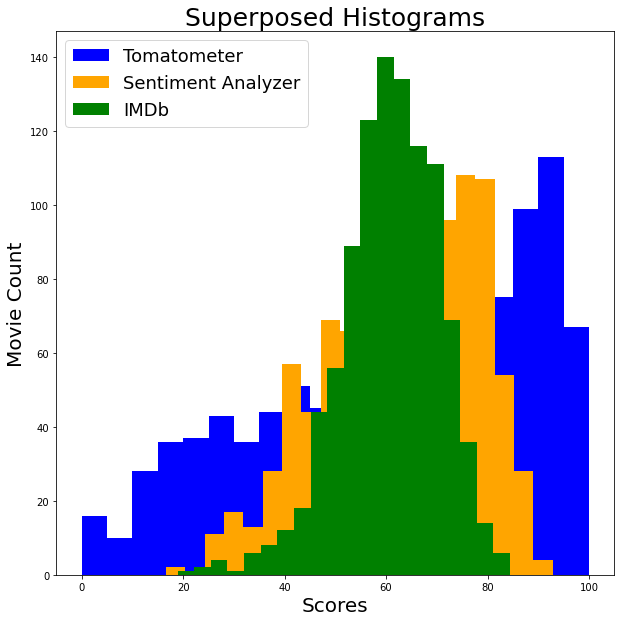

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.hist(data1, num_bins, facecolor='blue', label='Tomatometer')
ax.hist(data2, num_bins, facecolor='orange', label='Sentiment Analyzer')
ax.hist(data3, num_bins, facecolor='green', label='IMDb')
ax.set_title('Superposed Histograms', fontsize=25)
ax.set_ylabel('Movie Count', fontsize=20)
ax.set_xlabel('Scores', fontsize=20)
ax.legend(loc='upper left', fontsize=18)
plt.show()

In [9]:
print(f"Tomatometer Score Standard Deviation: {data1.std(): 2f}")
print(f"Sentiment Analyzer Score Standard Deviation: {data2.std(): 2f}")
print(f"IMDb Score Standard Deviation: {data3.std(): 2f}")

Tomatometer Score Standard Deviation:  27.318231
Sentiment Analyzer Score Standard Deviation:  15.242138
IMDb Score Standard Deviation:  9.713144


In [10]:
sda.add_cols(df)
df

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score,Tomatometer - SA,SA - IMDb,Tomatometer - IMDb
0,Red Notice,92.0,35,rotten,46.762225,60.000000,-11.762225,-13.237775,-25.000000
1,Finch,67.0,73,fresh,66.533956,66.666667,6.466044,-0.132711,6.333333
2,The Many Saints of Newark,59.0,71,fresh,65.852098,60.000000,5.147902,5.852098,11.000000
3,Worth,77.0,81,certified-fresh,73.602667,64.444444,7.397333,9.158223,16.555556
4,Cinderella,61.0,42,rotten,50.559862,70.000000,-8.559862,-19.440138,-28.000000
...,...,...,...,...,...,...,...,...,...
985,Shanghai,37.0,4,rotten,16.623056,68.888889,-12.623056,-52.265833,-64.888889
986,Hotel Transylvania 2,63.0,55,rotten,59.537158,63.333333,-4.537158,-3.796175,-8.333333
987,The Green Inferno,29.0,38,rotten,55.329595,47.777778,-17.329595,7.551818,-9.777778
988,The Walk,77.0,83,certified-fresh,73.959908,70.000000,9.040092,3.959908,13.000000


In [11]:
means, stds = sda.compute_stats(df)
sample_size = 3*[len(df)]

In [12]:
def confidence_interval_for_collection(sample_size=[], standard_deviation=[], mean=[], confidence=0.95):
    degrees_freedom = [count - 1 for count in sample_size]
    outlier_tails = (1.0 - confidence) / 2.0
    confidence_collection = [outlier_tails for _ in sample_size]
    t_distribution_number = [-1 * t.ppf(tails, df) for tails, df in zip(confidence_collection, degrees_freedom)]

    step_1 = [std/math.sqrt(count) for std, count in zip(standard_deviation, sample_size)]
    step_2 = [step * t for step, t in zip(step_1, t_distribution_number)]

    low_end = [mean_num - step_num for mean_num, step_num in zip(mean, step_2)]
    high_end = [mean_num + step_num for mean_num, step_num in zip(mean, step_2)]

    return low_end, high_end

In [13]:
intervals = confidence_interval_for_collection(sample_size=(sample_size), standard_deviation=(stds), mean=(means), confidence=0.95)
tom_sa_low, sa_imdb_low, tom_imdb_low = tuple(intervals[0])
tom_sa_high, sa_imdb_high, tom_imdb_high = tuple(intervals[1])

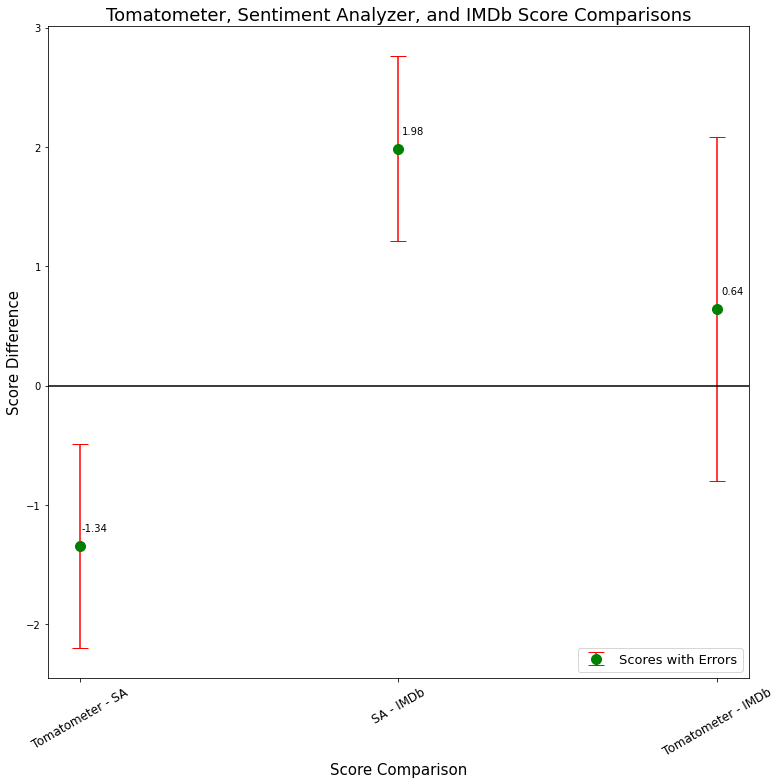

In [14]:
data = np.zeros(3, dtype={'names':('Score Type', 'Means', 'yerr'),
                          'formats':('U'+str(20), 'f8', 'f8')})
data['Score Type'] = ['Tomatometer - SA' , 'SA - IMDb', 'Tomatometer - IMDb']
data['Means'] = means
data['yerr'] = [tom_sa_high - means[0], sa_imdb_high - means[1], tom_imdb_high - means[2]]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,11))
ax.errorbar(data['Score Type'], data['Means'], yerr=data['yerr'], fmt='go', \
            markersize=10, ecolor='r', capsize=8, label='Scores with Errors')
plt.xticks(rotation=30, fontsize = 12)
for val in data:
    label = f'{val["Means"]:.2f}'
    plt.annotate(label,
                 (val["Score Type"], val["Means"]),
                 textcoords="offset points",
                 xytext=(15, 15),
                 ha='center')
ax.set_title("Tomatometer, Sentiment Analyzer, and IMDb Score Comparisons", fontsize=18)
ax.set_xlabel("Score Comparison", fontsize=15)
ax.set_ylabel("Score Difference", fontsize=15)
ax.axhline(y=0.0, color='black')
ax.legend(loc='lower right', fontsize=13)
fig.tight_layout()
plt.show()

In [77]:
df_low_scores = df[df['Tomatometer Score'] <= 20]
df_low_scores

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score,Tomatometer - SA,SA - IMDb,Tomatometer - IMDb
23,Breach,58.0,20,rotten,43.346330,66.666667,-23.346330,-23.320337,-46.666667
24,Redemption Day,54.0,13,rotten,40.801235,55.555556,-27.801235,-14.754321,-42.555556
25,Stardust,23.0,20,rotten,40.135571,73.333333,-20.135571,-33.197762,-53.333333
49,Hard Kill,61.0,0,rotten,27.150324,25.555556,-27.150324,1.594768,-25.555556
52,The Tax Collector,72.0,19,rotten,29.234983,42.222222,-10.234983,-12.987239,-23.222222
...,...,...,...,...,...,...,...,...,...
939,Alvin and the Chipmunks: The Road Chip,51.0,15,rotten,39.125124,44.444444,-24.125124,-5.319321,-29.444444
970,Rock the Kasbah,28.0,7,rotten,26.121036,50.000000,-19.121036,-23.878964,-43.000000
973,The Last Witch Hunter,43.0,18,rotten,31.489740,55.555556,-13.489740,-24.065815,-37.555556
976,Love the Coopers,36.0,18,rotten,40.029826,53.333333,-22.029826,-13.303507,-35.333333


In [74]:
means2, stds2 = sda.compute_stats(df_low_scores)
sample_size2 = 3*[len(df_low_scores)]

In [75]:
intervals = confidence_interval_for_collection(sample_size=(sample_size2), standard_deviation=(stds2), mean=(means2), confidence=0.95)
tom_sa_low2, sa_imdb_low2, tom_imdb_low2 = tuple(intervals[0])
tom_sa_high2, sa_imdb_high2, tom_imdb_high2 = tuple(intervals[1])

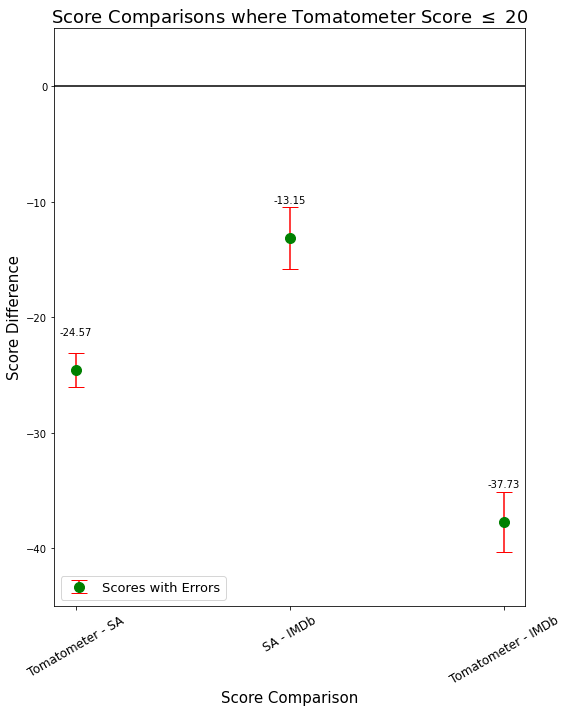

In [76]:
data = np.zeros(3, dtype={'names':('Score Type', 'Means', 'yerr'),
                          'formats':('U'+str(20), 'f8', 'f8')})
data['Score Type'] = ['Tomatometer - SA' , 'SA - IMDb', 'Tomatometer - IMDb']
data['Means'] =means2
data['yerr'] = [tom_sa_high2 - means2[0], sa_imdb_high2 - means2[1], tom_imdb_high2 - means2[2]]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
ax.errorbar(data['Score Type'], data['Means'], yerr=data['yerr'], fmt='go', \
            markersize=10, ecolor='r', capsize=8, label='Scores with Errors')
plt.xticks(rotation=30, fontsize = 12)
for val in data:
    label = f'{val["Means"]:.2f}'
    plt.annotate(label,
                 (val["Score Type"], val["Means"]),
                 textcoords="offset points",
                 xytext=(0, 35),
                 ha='center')
ax.set_title("Score Comparisons where Tomatometer Score $\leq$ 20", fontsize=18)
ax.set_xlabel("Score Comparison", fontsize=15)
ax.set_ylabel("Score Difference", fontsize=15)
ax.set_ylim(-45, 5)
ax.axhline(y=0.0, color='black')
ax.legend(loc='lower left', fontsize=13)
fig.tight_layout()
plt.show()

In [94]:
df_high_scores = df[df['Tomatometer Score'] >= 80]
df_high_scores

,Title,Audience Score,Tomatometer Score,Rating,SA Score,IMDb Score,Tomatometer - SA,SA - IMDb,Tomatometer - IMDb
3,Worth,77.0,81,certified-fresh,73.602667,64.444444,7.397333,9.158223,16.555556
6,Pig,84.0,97,certified-fresh,83.283863,65.555556,13.716137,17.728308,31.444444
8,Stalker,45.0,92,fresh,80.072717,78.888889,11.927283,1.183828,13.111111
9,Luca,86.0,91,certified-fresh,80.553047,72.222222,10.446953,8.330825,18.777778
10,Werewolves Within,81.0,86,certified-fresh,78.673787,55.555556,7.326213,23.118232,30.444444
...,...,...,...,...,...,...,...,...,...
975,99 Homes,78.0,92,certified-fresh,78.969960,67.777778,13.030040,11.192182,24.222222
979,Straight Outta Compton,91.0,89,certified-fresh,73.959248,75.555556,15.040752,-1.596308,13.444444
983,The Diary of a Teenage Girl,73.0,95,certified-fresh,88.806248,64.444444,6.193752,24.361803,30.555556
984,The Second Mother,90.0,97,certified-fresh,85.051717,75.555556,11.948283,9.496162,21.444444


In [95]:
means3, stds3 = sda.compute_stats(df_high_scores)
sample_size3 = 3*[len(df_high_scores)]

In [96]:
intervals = confidence_interval_for_collection(sample_size=(sample_size3), standard_deviation=(stds3), mean=(means3), confidence=0.95)
tom_sa_low3, sa_imdb_low3, tom_imdb_low3 = tuple(intervals[0])
tom_sa_high3, sa_imdb_high3, tom_imdb_high3 = tuple(intervals[1])

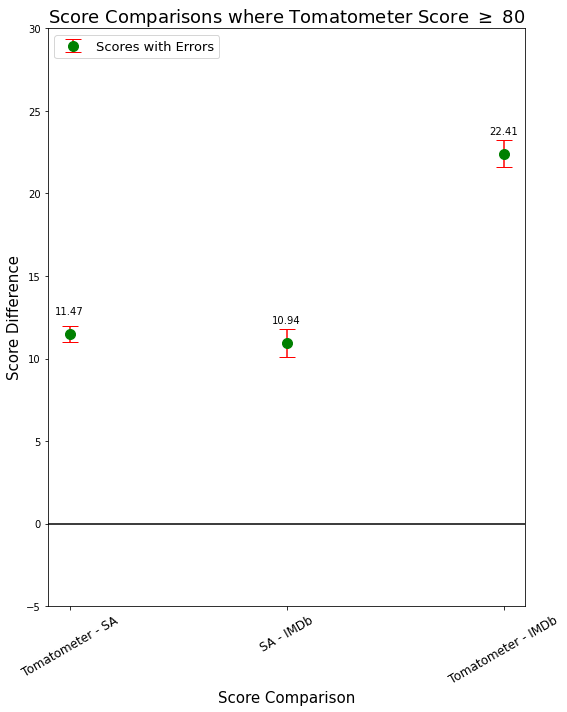

In [99]:
data = np.zeros(3, dtype={'names':('Score Type', 'Means', 'yerr'),
                          'formats':('U'+str(20), 'f8', 'f8')})
data['Score Type'] = ['Tomatometer - SA' , 'SA - IMDb', 'Tomatometer - IMDb']
data['Means'] =means3
data['yerr'] = [tom_sa_high3 - means3[0], sa_imdb_high3 - means3[1], tom_imdb_high3 - means3[2]]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10))
ax.errorbar(data['Score Type'], data['Means'], yerr=data['yerr'], fmt='go', \
            markersize=10, ecolor='r', capsize=8, label='Scores with Errors')
plt.xticks(rotation=30, fontsize = 12)
for val in data:
    label = f'{val["Means"]:.2f}'
    plt.annotate(label,
                 (val["Score Type"], val["Means"]),
                 textcoords="offset points",
                 xytext=(0, 20),
                 ha='center')
ax.set_title("Score Comparisons where Tomatometer Score $\geq$ 80", fontsize=18)
ax.set_xlabel("Score Comparison", fontsize=15)
ax.set_ylabel("Score Difference", fontsize=15)
ax.set_ylim(-5, 30)
ax.axhline(y=0.0, color='black')
ax.legend(loc='upper left', fontsize=13)
fig.tight_layout()
plt.show()

In [19]:
sentiment_strengths = sab.gen_sentiment_strengths_from_csv('sentiment_strengths.csv')

In [20]:
rescoring.rescore_movie('https://www.rottentomatoes.com/m/dune_2021', sentiment_strengths)

Movie Title: Dune,	Audience Score: 90,	Critic Score: 82,	Sentiment Analyzer Score: 68.59971664268967
